In [14]:
%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
import itertools

In [23]:
fe_II = [5018.44, 5234.63,5284.1,5325.56,5414.05,5425.25,5991.37,
        6084.1,6149.25,6247.58,6416.92,6432.68,6456.38]

/Users/dbranton/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide


Average Percent Difference:  0.498435050392
Fraction of Measurements within uncertainties:  0.676931690929
Fraction of Measurements with greater than 5% Difference: 0.180291153415
Fraction of Measurements with greater than 10% Difference: 0.0506718924972
Fraction of Lines with greater than 5% Difference: 0.0
Lines with greater than 20% Difference: []


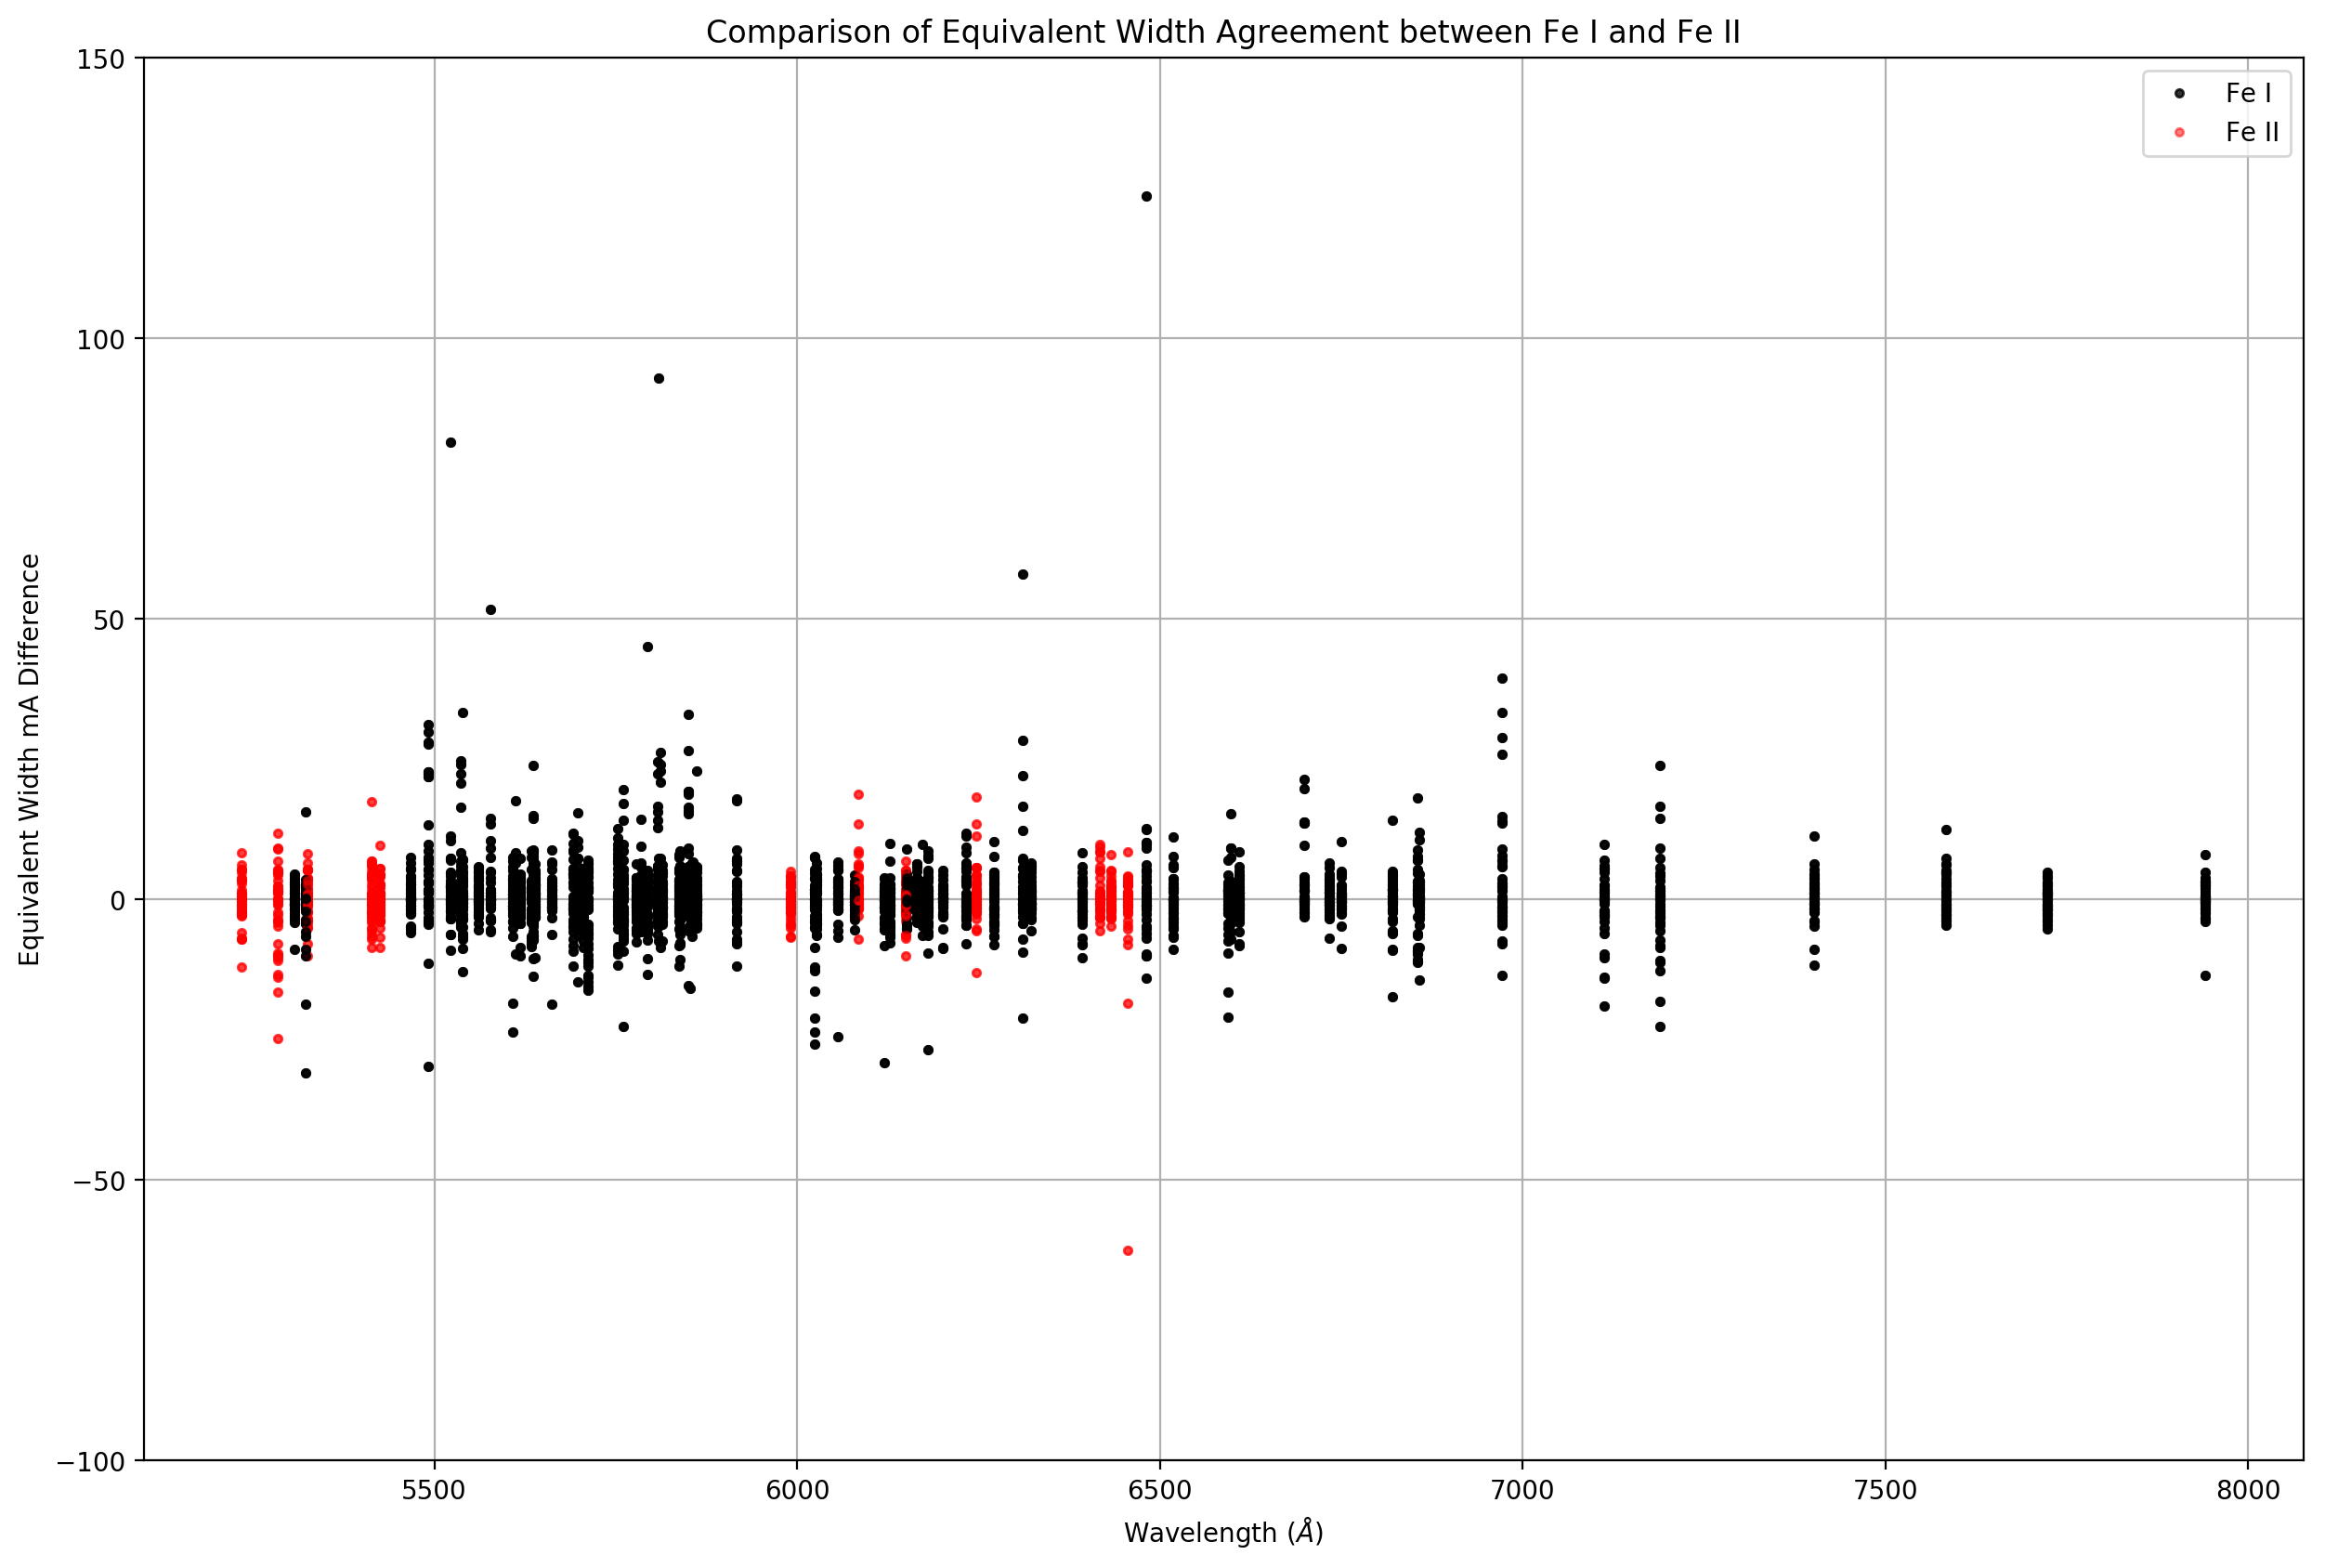

In [36]:
tame_outputs = glob.glob('data/ew_known/equiv_widths/*.ew') + glob.glob('data/ew_known/equiv_widths/*.ew')
#tame_outputs = glob.glob('data/equiv_widths/*.ew')
byhand_outputs = ['data/ew_known/tame_inputs/'+output.split('/')[-1] for output in tame_outputs]
output_labels = [output.split('/')[-1].split('.')[0] for output in tame_outputs]


fig = plt.figure(figsize=(15,10))
fig.dpi = 200
plt.grid()
plt.xlabel(r"Wavelength ($\AA$)")
plt.ylabel("Equivalent Width mA Difference")
plt.title("Comparison of Equivalent Width Agreement between Fe I and Fe II")
plt.ylim(-100,150)


pdiff_avg = []
avg_unc = []
lineshift_avg = []
agree_num = 0
for i, ew_contents in enumerate(zip(byhand_outputs, tame_outputs,output_labels)):
    byhand_output, tame_output, label = ew_contents
    ew_hand = pd.read_csv(byhand_output,delim_whitespace=True,header = None)
    ew_tame = pd.read_csv(tame_output,skiprows=1,delim_whitespace=True,header=None)
    
    hand_df = ew_hand[[0,4]].sort_values(by=0, ascending=False) # Wavelength and Equivalent Width
    tame_df = ew_tame # Wavelength, Equivalent Width, and linecenter
    
    sync = np.array(hand_df[0]) - np.array(tame_df[0])
    pdiff = ((np.array(tame_df[1])-np.array(hand_df[4]))/np.array(hand_df[4])) * 100
    pdiff = np.array(tame_df[1]) - np.array(hand_df[4])
    agree_num += np.sum(abs(np.array(tame_df[1]) - np.array(hand_df[4])) <= tame_df[2])
    pdiff_avg.append(pdiff)
    
    
    #print(pdiff_avg)
    
    masked_pdiff = [val for val in pdiff if not np.isinf(val) and not (np.isnan(val))]
    masked_wav = np.round([wav for val,wav in zip(pdiff,hand_df[0]) if not np.isinf(val) and not (np.isnan(val))],2)
    #masked_unc = [unc for val,unc in zip(pdiff,pdiff_unc) if not np.isinf(val) and not (np.isnan(val))]

    fe_II_wav = []
    fe_II_diff = []
    fe_I_wav = []
    fe_I_diff = []
    for diff, wav in zip(masked_pdiff, masked_wav):
        if wav in fe_II:
            fe_II_wav.append(wav)
            fe_II_diff.append(diff)
        else:
            fe_I_wav.append(wav)
            fe_I_diff.append(diff)
        
    if i == 0:
        plt.plot(fe_I_wav,fe_I_diff, '.', color='k', label="Fe I", alpha=0.8)
        plt.plot(fe_II_wav,fe_II_diff, '.', color='r', label="Fe II", alpha=0.5)
    else:
        plt.plot(fe_I_wav,fe_I_diff, '.', color='k', alpha=0.8)
        plt.plot(fe_II_wav,fe_II_diff, '.', color='r', alpha=0.5)
plt.legend()    

zipped_pdiff = list(zip(*[pdiff for pdiff in pdiff_avg]))
masked_pdiff = [[val for val in pdiff if not np.isinf(val) and not (np.isnan(val))] for pdiff in zipped_pdiff]
all_pdiff = np.concatenate( masked_pdiff, axis=0 )
print("Average Percent Difference: ", np.mean(all_pdiff))
print("Fraction of Measurements within uncertainties: ", agree_num/len(all_pdiff))
print("Fraction of Measurements with greater than 5% Difference:", np.sum(abs(all_pdiff) > 5)/len(all_pdiff))
print("Fraction of Measurements with greater than 10% Difference:", np.sum(abs(all_pdiff) > 10)/len(all_pdiff))
pdiff_avg = [np.median(pdiff) for pdiff in masked_pdiff]

# Specific Issue Lines
print("Fraction of Lines with greater than 5% Difference:", len(np.array(hand_df[0])[abs(np.array(pdiff_avg)) >10])/len(hand_df[0]))
print("Lines with greater than 20% Difference:",np.array(hand_df[0])[abs(np.array(pdiff_avg)) >20])

/Users/dbranton/miniconda3/envs/astroconda/lib/python3.5/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


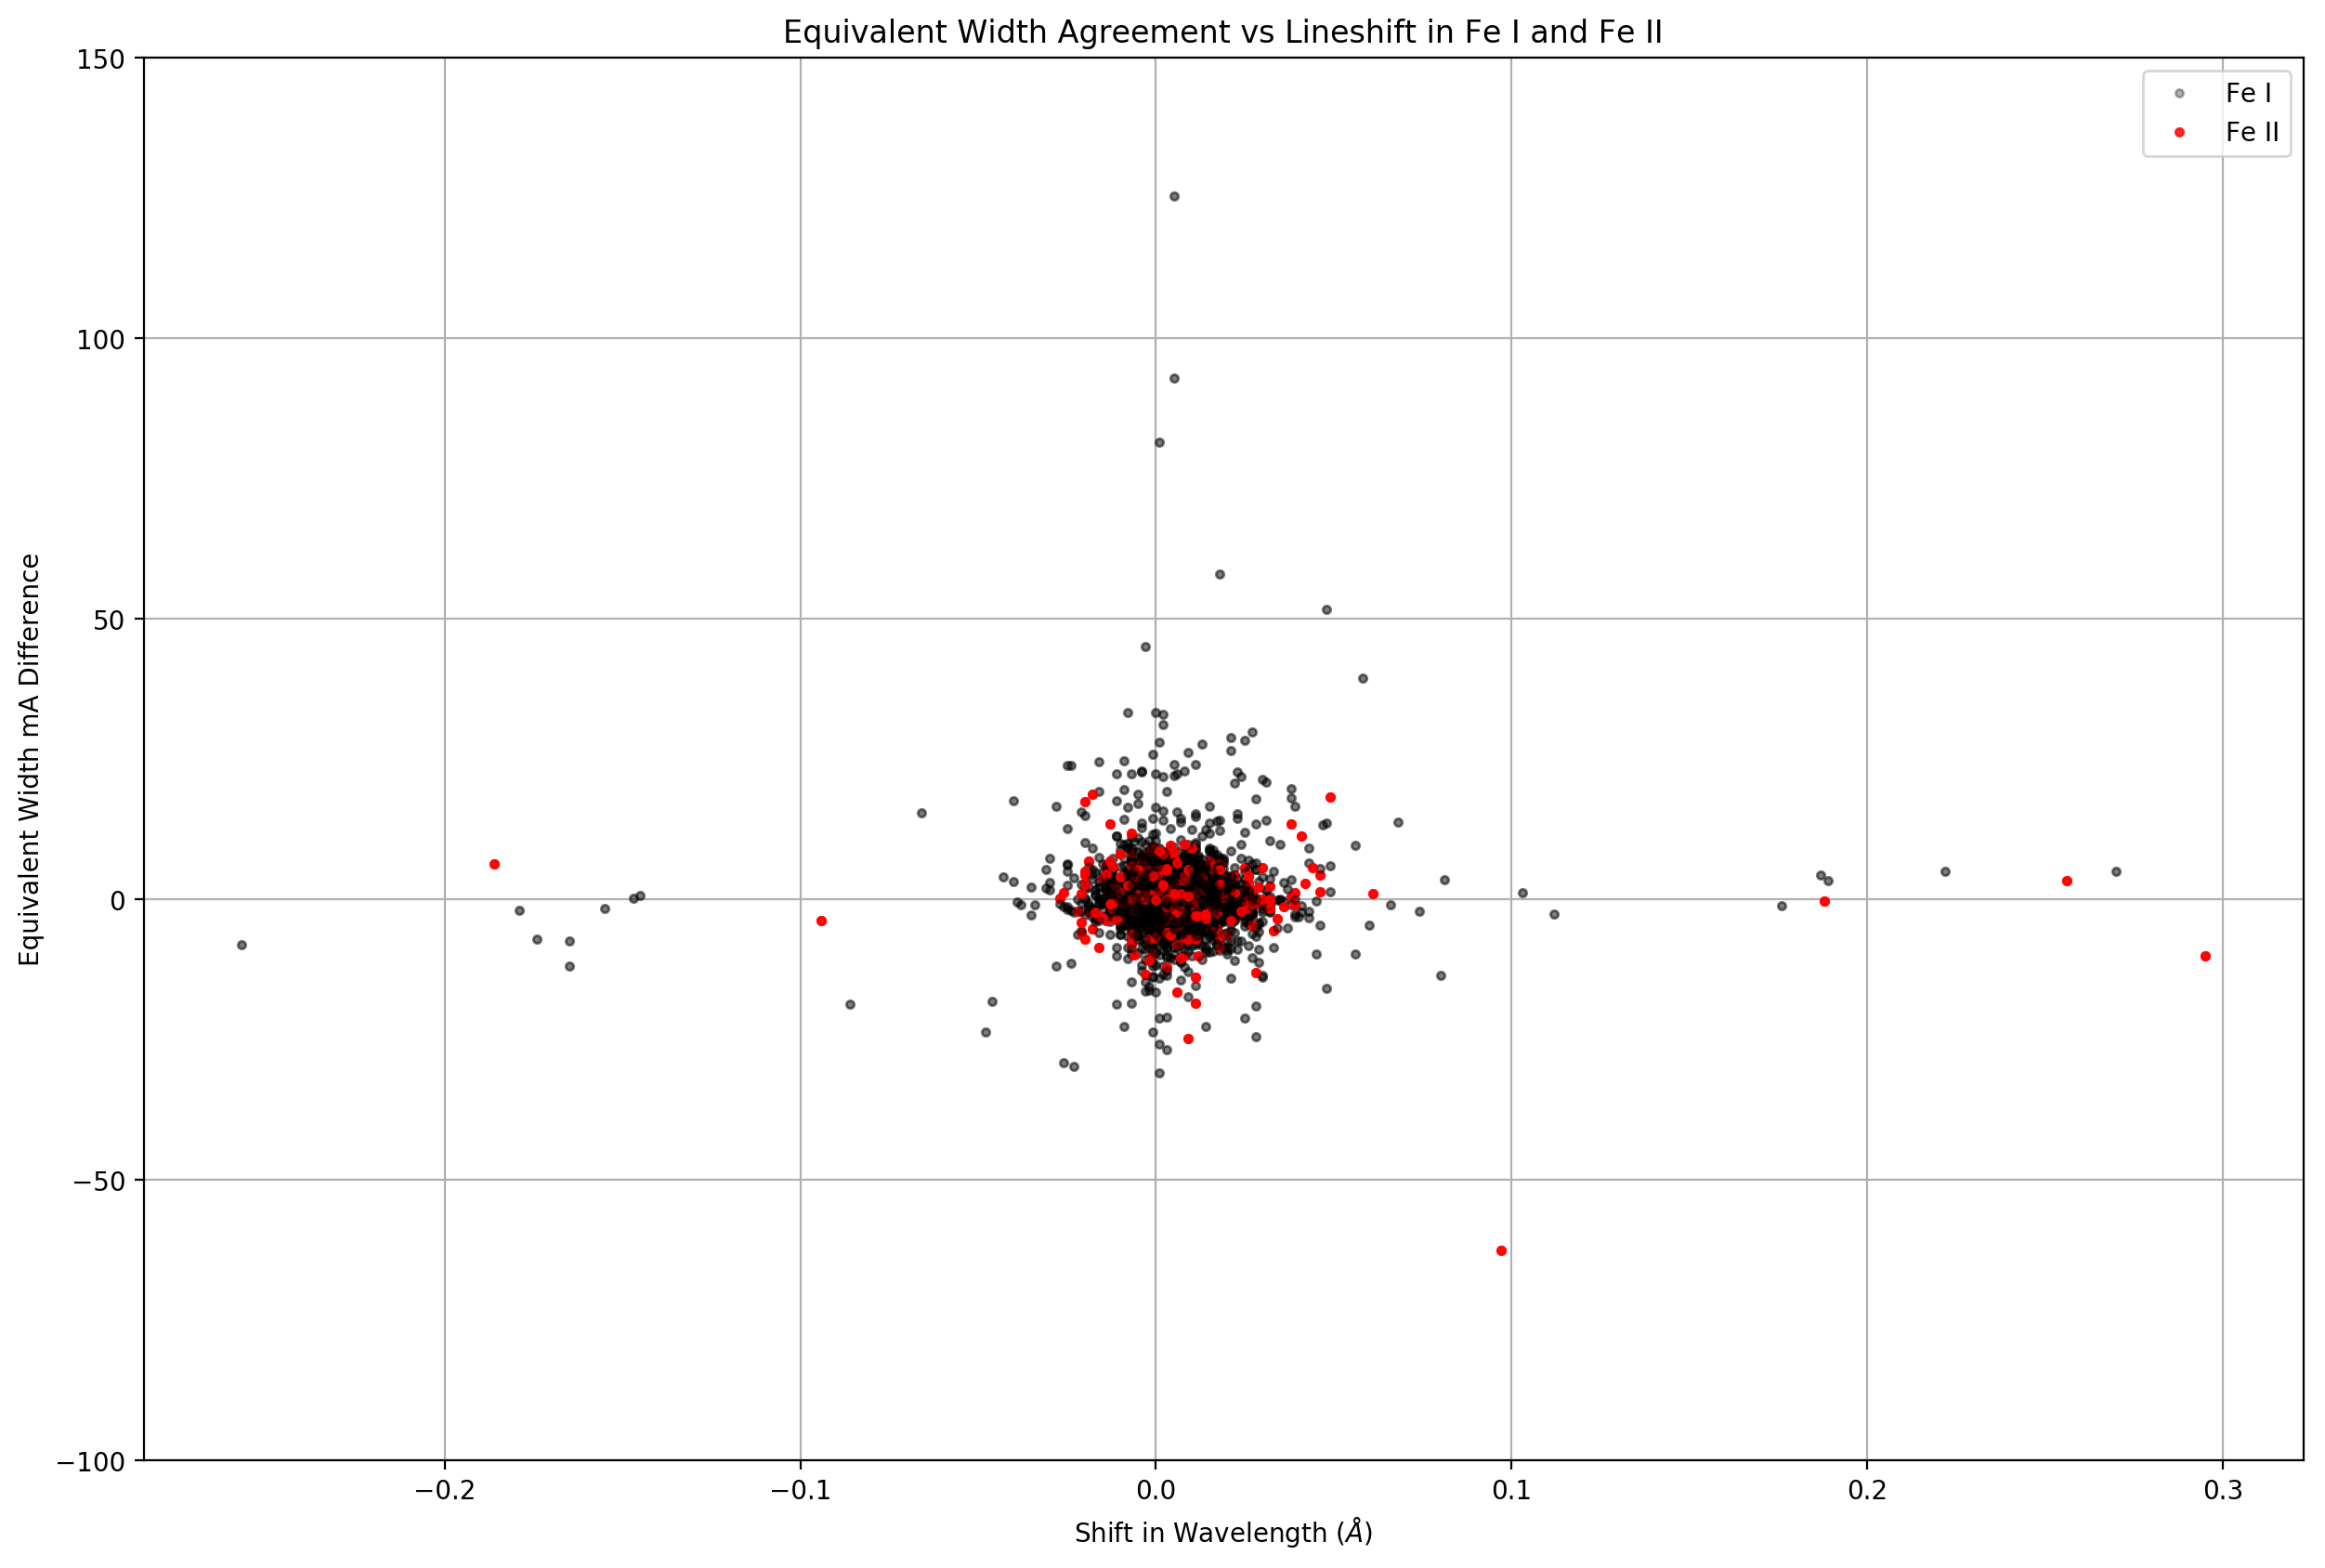

In [56]:
tame_outputs = glob.glob('data/ew_known/equiv_widths/*.ew') + glob.glob('data/ew_known/equiv_widths/*.ew')
#tame_outputs = glob.glob('data/equiv_widths/*.ew')
byhand_outputs = ['data/ew_known/tame_inputs/'+output.split('/')[-1] for output in tame_outputs]
output_labels = [output.split('/')[-1].split('.')[0] for output in tame_outputs]

fig = plt.figure(figsize=(15,10))
fig.dpi = 200
plt.grid()
plt.xlabel(r"Shift in Wavelength ($\AA$)")
plt.ylabel("Equivalent Width mA Difference")
plt.title("Equivalent Width Agreement vs Lineshift in Fe I and Fe II")
plt.ylim(-100,150)

color_idx = np.linspace(0, 1, len(tame_outputs))
pdiff_avg = []
avg_unc = []
lineshift_avg = []
for i,byhand_output, tame_output,label in zip(color_idx,byhand_outputs, tame_outputs,output_labels):
    
    #Bad Stars -- affected particularly badly by TAME line recognition issue
    if tame_output in glob.glob("data/equiv_widths/*2129*") + glob.glob("data/equiv_widths/*3122*"):
        pass
    ew_hand = pd.read_csv(byhand_output,delim_whitespace=True,header = None)
    ew_tame = pd.read_csv(tame_output,skiprows=1,delim_whitespace=True,header=None)
    #print(ew_tame)
    hand_df = ew_hand[[0,4]].sort_values(by=0, ascending=False) # Wavelength and Equivalent Width
    tame_df = ew_tame # Wavelength, Equivalent Width, and linecenter
    #print(tame_df)
    
    sync = np.array(hand_df[0]) - np.array(tame_df[0])
    #pdiff = ((np.array(tame_df[1])-np.array(hand_df[4]))/np.array(hand_df[4])) * 100
    pdiff = np.array(tame_df[1])-np.array(hand_df[4])
    lineshift = np.array(tame_df[0] - np.array(tame_df[3]))
    pdiff_avg.append(pdiff)
    #avg_unc.append(pdiff_unc)
    #print(np.array(tame_df[0])[abs(pdiff) > 50],np.array(tame_df[1])[abs(pdiff) > 50], np.array(hand_df[4])[abs(pdiff) > 50])
    
    #print(pdiff_avg)
    
    masked_pdiff = [val for val in pdiff if not np.isinf(val)]
    masked_wav = [wav for val,wav in zip(pdiff,hand_df[0]) if not np.isinf(val)]
    masked_shift = [wav for val,wav in zip(pdiff,lineshift) if not np.isinf(val)]
    
    fe_II_wav = []
    fe_II_diff = []
    fe_II_shift = []
    fe_I_wav = []
    fe_I_diff = []
    fe_I_shift = []
    for diff, wav, shift in zip(masked_pdiff, masked_wav, masked_shift):
        if wav in fe_II:
            fe_II_wav.append(wav)
            fe_II_diff.append(diff)
            fe_II_shift.append(shift)
            
        else:
            fe_I_wav.append(wav)
            fe_I_diff.append(diff)
            fe_I_shift.append(shift)
        
    if i == 0:
        plt.plot(fe_I_shift,fe_I_diff, '.', color='k', label="Fe I", alpha=0.3)
        plt.plot(fe_II_shift,fe_II_diff, '.', color='r', label="Fe II", alpha=0.8)
    else:
        plt.plot(fe_I_shift,fe_I_diff, '.', color='k', alpha=0.3)
        plt.plot(fe_II_shift,fe_II_diff, '.', color='r', alpha=0.8)
    
    #plt.plot(masked_shift,masked_pdiff, '.', color=plt.cm.cool(i), label=label)
    #plt.plot(tame_df[0],pdiff,'.', color=plt.cm.cool(i), label=label)
    #plt.axvline(0.04, alpha=0.5, color=plt.cm.cool(i))
    #
    #print(np.mean(masked_pdiff),np.std(masked_pdiff))
plt.legend()    

zipped_pdiff = list(zip(*[pdiff for pdiff in pdiff_avg]))
masked_pdiff = [[val for val in pdiff if not np.isinf(val)] for pdiff in zipped_pdiff]
pdiff_avg = [np.median(pdiff) for pdiff in masked_pdiff]